#***Predict The Defense Ready Condition Levels***

Defense Ready Condition (DEFCON) Levels are a way of identifying the current threat level faced by the Department of Defense and the United States military. These levels, on a scale from one to five, indicate the highest level of threat and readiness for it to the lowest level of preparedness required for peacetime.

###**Data**

Data files

train.csv: Contains the training data; 10001 x 12 (includes headers)

test.csv: Contains the test data; 2501 x 12 (includes headers)

sample submission.csv: Contains the format that the submission file is expected to be submitted in 




##**Improt Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as XGB

##**Load(import) DataSEets Form Train And Test 'csv' File using Pandas lib Function**

##***Load Train DataSets***

In [2]:
Train_DF = pd.read_csv("train.csv")
Train_DF.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


##***Load Test DataSets***

In [3]:
Test_Df = pd.read_csv("test.csv")

Test_Df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21


##**Data preprocessing & Analysis**

In [4]:
# Check number of shapes available in dataSets

Train_DF.shape  # Count Train DataSet Shape Using Shape

(10000, 12)

In [5]:
Test_Df.shape  # Count Test DataSets shape Using Shape

(2500, 11)

In [6]:
# Display All information like Data type and memory uses and so on using info()

Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


###The ***describe()*** method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [7]:
# Display 
Train_DF.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,8.317800,0.524100,0.270548,2.50230,15.754300,46.534600,0.486639,350.885758,0.891300,9.174874e+05,2.616600,6266.554200
std,1.748802,0.500244,0.196434,1.31178,10.388906,34.012649,0.134552,16.285744,0.329082,9.271764e+04,0.802788,3610.170288
min,5.000000,0.000000,0.000000,1.00000,1.000000,6.000000,0.000000,290.440000,0.000000,7.392000e+05,1.000000,2.000000
25%,7.000000,0.000000,0.090000,2.00000,7.000000,21.000000,0.406021,340.260000,1.000000,8.360000e+05,2.000000,3139.750000
50%,8.000000,1.000000,0.260000,2.00000,13.000000,37.000000,0.486784,350.860000,1.000000,8.976000e+05,3.000000,6280.500000
75%,9.000000,1.000000,0.430000,3.00000,21.000000,62.000000,0.567548,360.400000,1.000000,9.768000e+05,3.000000,9391.500000
max,16.000000,2.000000,1.000000,16.00000,72.000000,289.000000,1.000000,425.060000,2.000000,1.311200e+06,5.000000,12500.000000


###**Correlation of DF**
corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [8]:
# Display Correlation using corr()

Train_DF.corr()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
Allied_Nations,1.000000,-0.278779,0.650308,0.111896,-0.113609,-0.067496,0.647604,-0.668521,0.096352,-0.110071,0.060440,0.003590
Diplomatic_Meetings_Set,-0.278779,1.000000,-0.576116,-0.036662,0.019046,0.089007,-0.030756,0.241155,-0.106499,-0.201561,-0.274835,0.014537
Percent_Of_Forces_Mobilized,0.650308,-0.576116,1.000000,0.149317,-0.036675,0.054474,0.357324,-0.529314,0.166989,0.085870,0.184876,-0.005668
Hostile_Nations,0.111896,-0.036662,0.149317,1.000000,0.146773,0.220252,0.299244,-0.081724,-0.004865,0.025103,-0.008469,-0.007541
Active_Threats,-0.113609,0.019046,-0.036675,0.146773,1.000000,0.674970,-0.009510,0.034700,-0.023317,-0.084188,-0.044782,0.006807
Inactive_Threats,-0.067496,0.089007,0.054474,0.220252,0.674970,1.000000,0.103296,-0.084670,-0.004199,-0.227941,-0.161675,-0.000820
Citizen_Fear_Index,0.647604,-0.030756,0.357324,0.299244,-0.009510,0.103296,1.000000,-0.336929,0.085540,-0.495305,-0.190940,0.000119
Closest_Threat_Distance(km),-0.668521,0.241155,-0.529314,-0.081724,0.034700,-0.084670,-0.336929,1.000000,-0.008636,0.177008,-0.030033,0.010935
Aircraft_Carriers_Responding,0.096352,-0.106499,0.166989,-0.004865,-0.023317,-0.004199,0.085540,-0.008636,1.000000,0.073819,0.125775,0.001647
Troops_Mobilized(thousands),-0.110071,-0.201561,0.085870,0.025103,-0.084188,-0.227941,-0.495305,0.177008,0.073819,1.000000,0.450504,0.002800


### **Drow Correlation Heatmap Using seabron lib**

Text(0.5, 1.0, 'Correlation HeatMap')

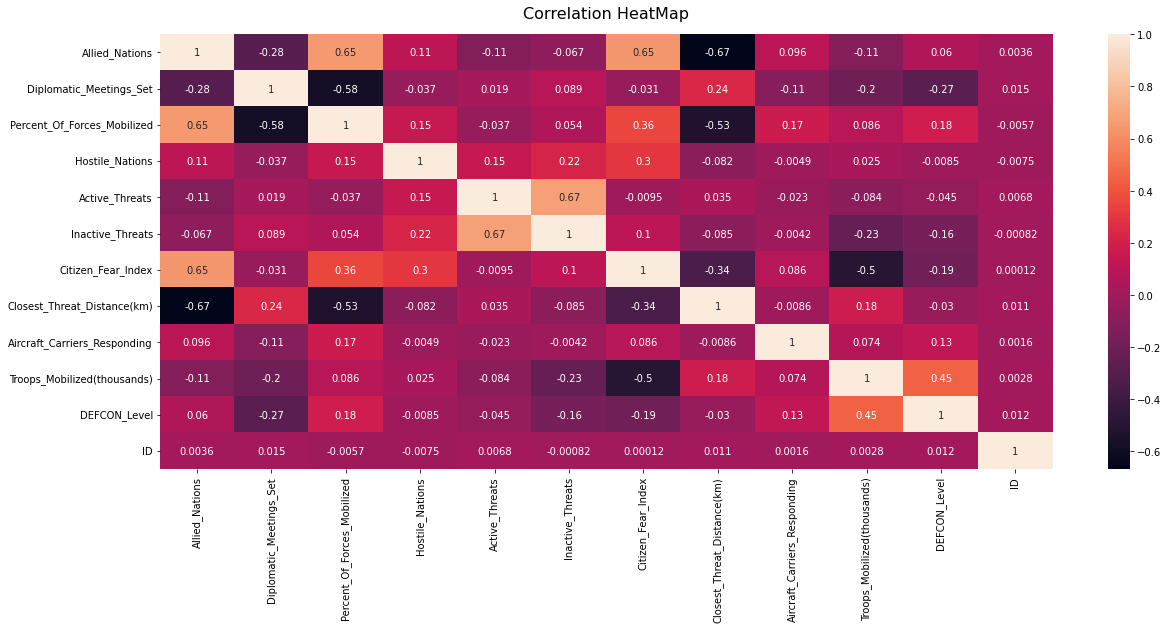

In [9]:
plt.figure(figsize=(20,8))
HeatMap = sns.heatmap(Train_DF.corr() , annot=True)
HeatMap.set_title("Correlation HeatMap",fontdict={"fontsize":16},pad=16)

### **Drow Pair Plot Using seabron lib**

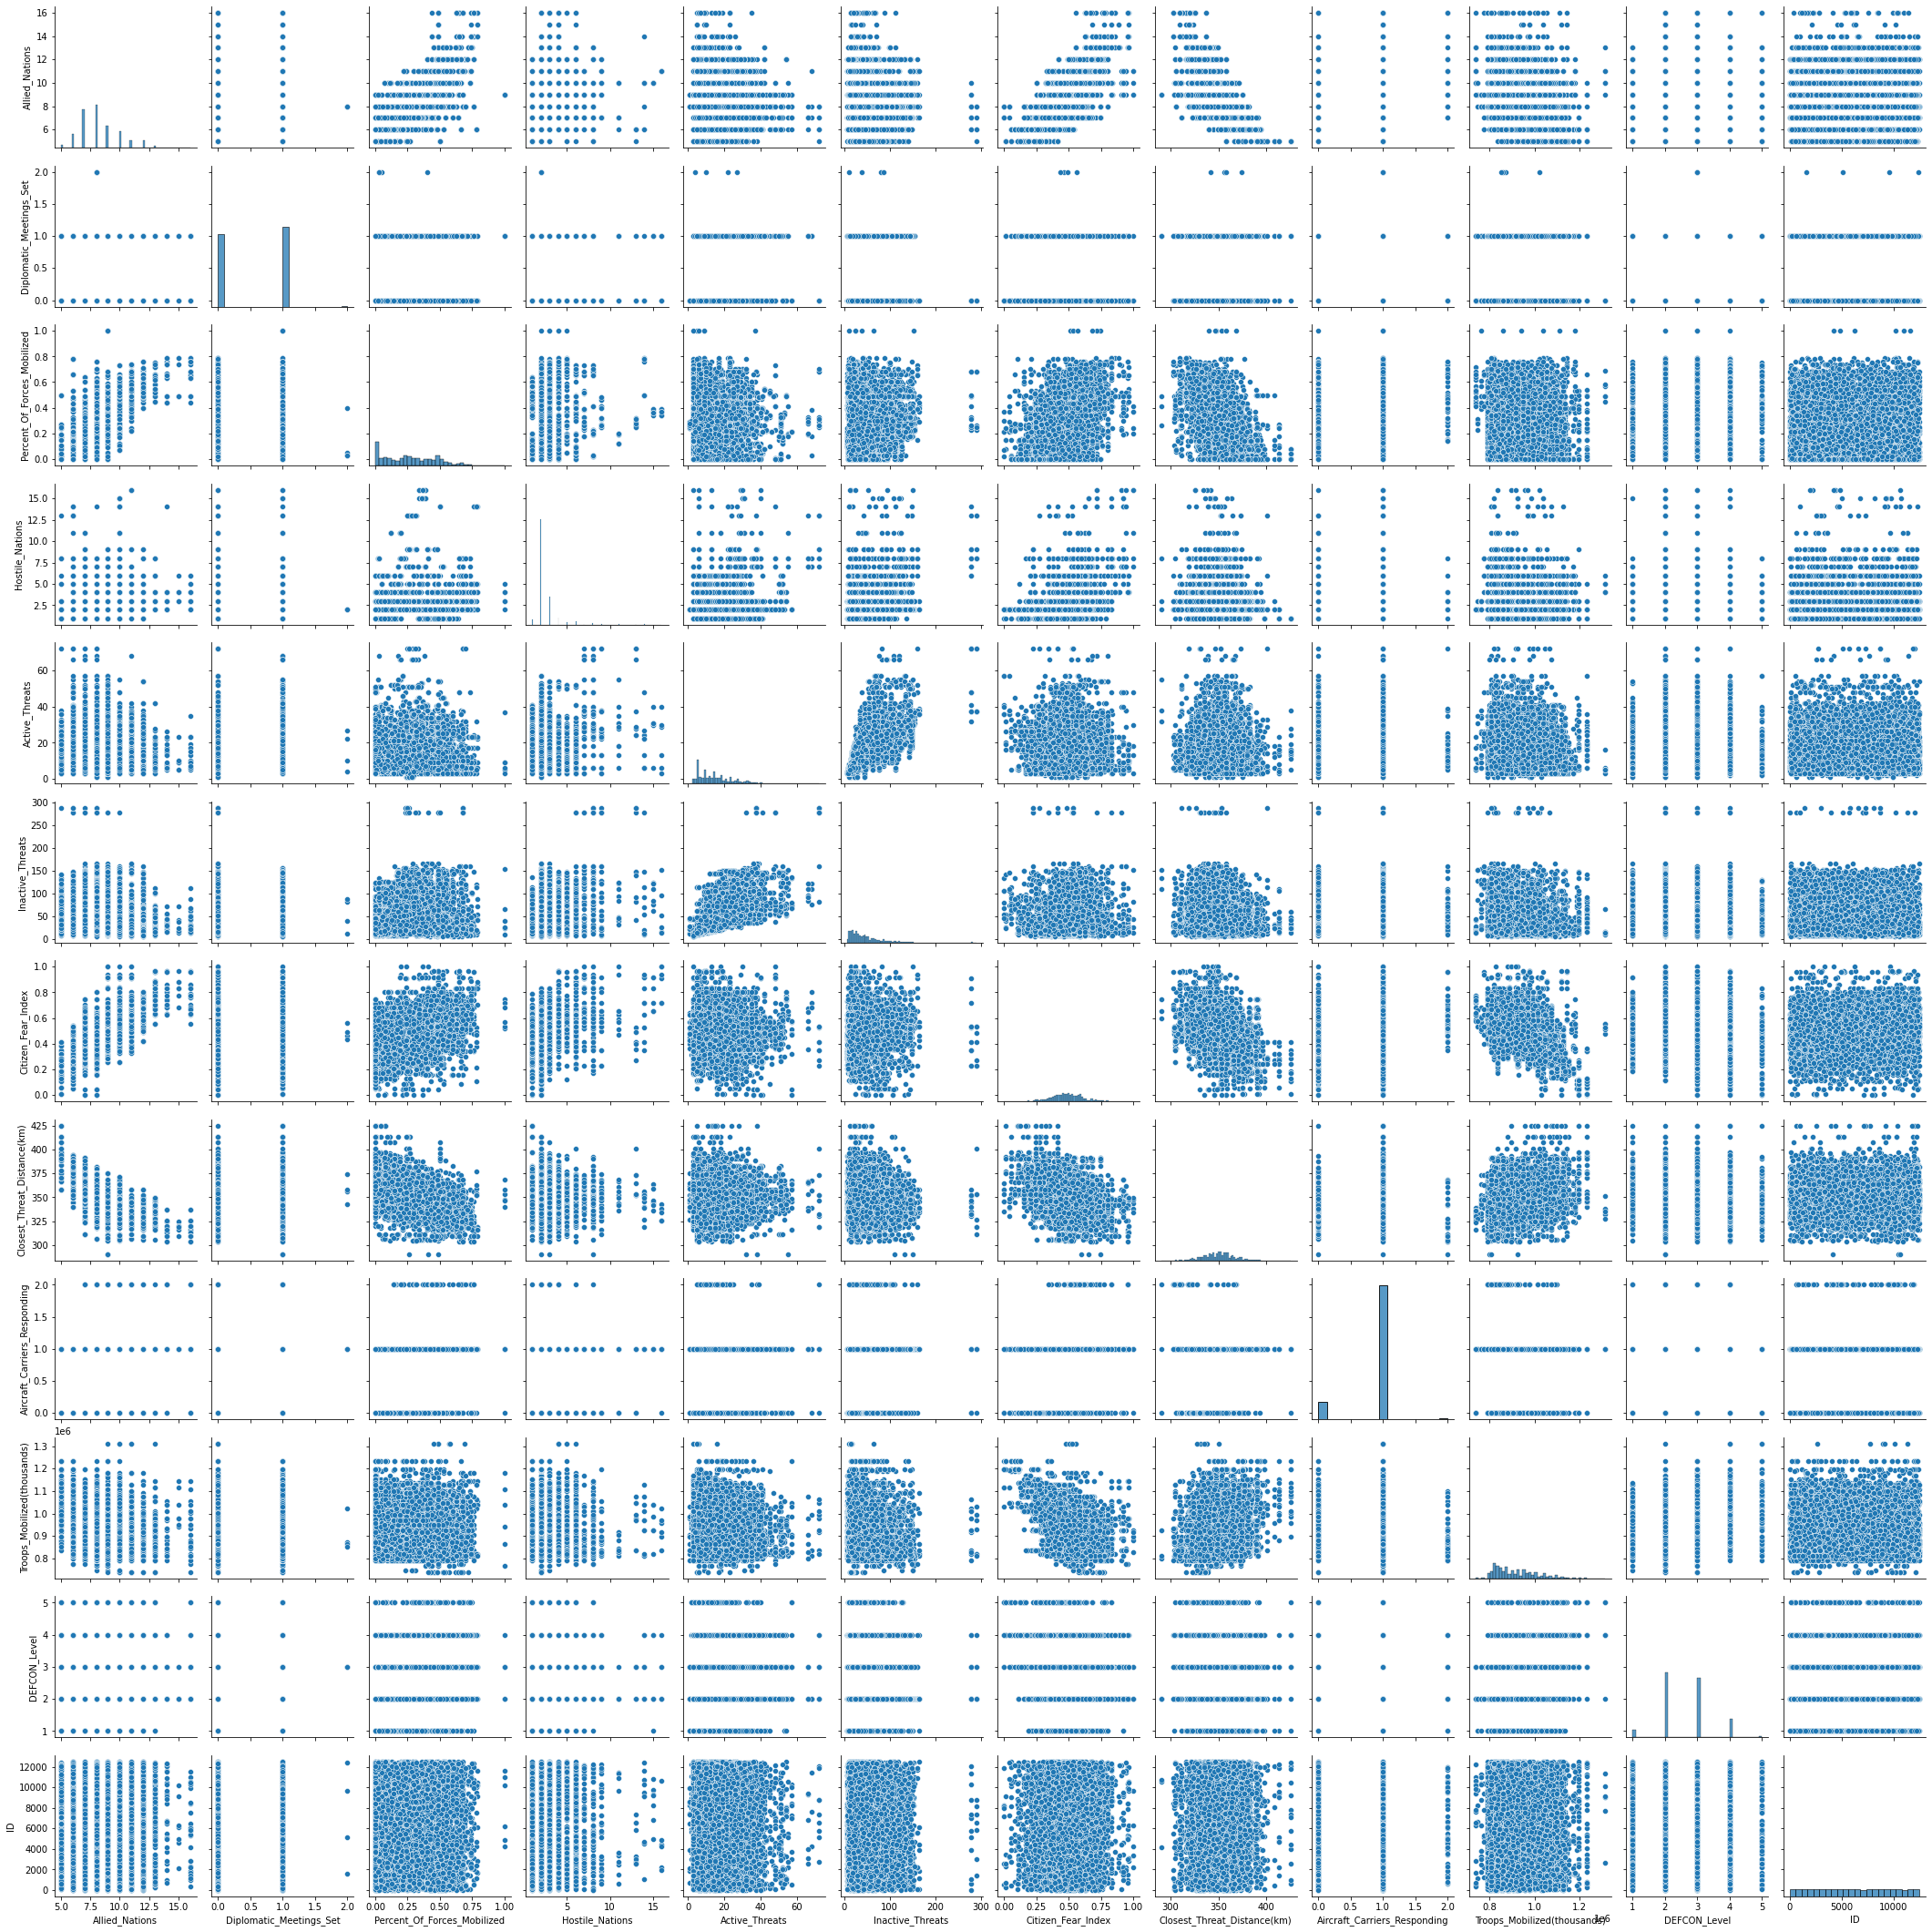

In [36]:
PairPlot = sns.pairplot(Train_DF,height=2.5)

###**Distribution of Defense Ready Condition (DEFCON) Levels**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


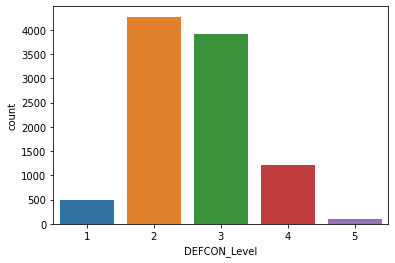

In [10]:
Plot=sns.countplot(Train_DF['DEFCON_Level']) 


###**Distribution of Active_Threats**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


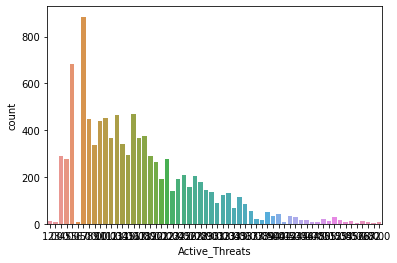

In [11]:
sns.countplot(Train_DF['Active_Threats'])

###**Distribution of Inactive_Threats**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


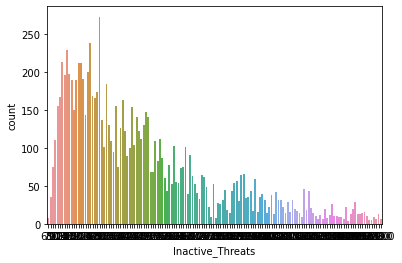

In [12]:
sns.countplot(Train_DF['Inactive_Threats'])

###**Distribution of Closest_Threat_Distance(km)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


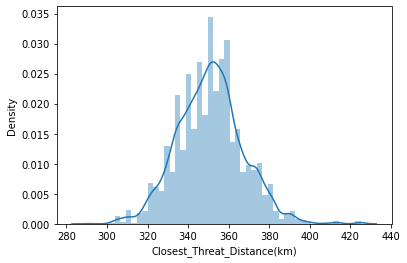

In [28]:
sns.distplot(Train_DF['Closest_Threat_Distance(km)'])

###**Distribution of Diplomatic_Meetings_Set'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


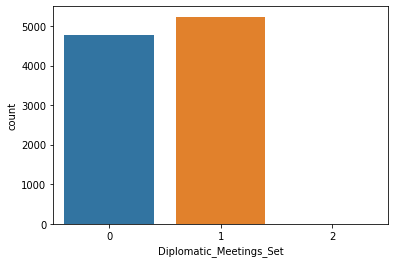

In [29]:
sns.countplot(Train_DF['Diplomatic_Meetings_Set'])

###**Distribution of Troops_Mobilized(thousands)**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


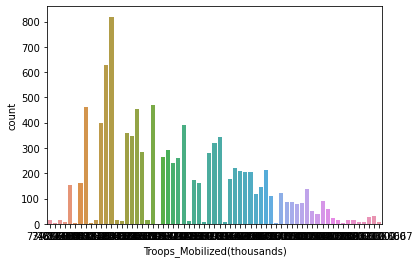

In [33]:
sns.countplot(Train_DF['Troops_Mobilized(thousands)'])

### **Analysis of missing values (NaNs)**
Find the Null values in Data Sets And Replace the null values using 'ffill' method or Median

In [13]:
#Find the Null values in Train Data Sets using isna() and count using sum()
Train_DF.isna().sum()  

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

In [14]:
#Find the Null values in Test Data Sets using isna() and count using sum()
Test_Df.isna().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
ID                              0
dtype: int64

##**Features Seleaction**
Seleact Required Features form data_Sets to build a model that can predict The defense readiness condition (DEFCON)

###**Find Depandent and Indepandent variables using datasets,where x are independent values and y : dependent values**

In [15]:
X = Train_DF.drop(['DEFCON_Level' , 'ID'],axis=1)

X.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0


##**Traget Variable is y**

In [16]:
y = Train_DF.DEFCON_Level

y.head()

0    3
1    4
2    3
3    3
4    2
Name: DEFCON_Level, dtype: int64

### **Select Feactures for test DataSets Using test.csv Dataset file**

In [17]:
Test_Features = Test_Df.drop(['ID'] , axis=1)

Test_Features.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0


##**Splitting Data into train and test**

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(8000, 10)
(2000, 10)



##***Machine Learning Models***



##**XGB Classifier Model**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) ... A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [19]:
from traitlets.traitlets import default
from typing import DefaultDict
from xgboost import XGBClassifier
XGB_Model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, 
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1)


##**Random forest classifier Model**

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model = RandomForestClassifier()

## **Support vector Classsifier Model**

In [21]:
from sklearn.svm import SVC
SVC_Model = SVC()

### **Fit Dependent and Independent Variables in XGB Model (X_train,y_train)**

In [22]:
RFC_Model.fit(X_train,y_train)

RandomForestClassifier()

##**Prediction**
Predicting the Results

In [23]:
Y_Pred = RFC_Model.predict(X_test)

Y_Pred=pd.Series(Y_Pred)

Y_Pred

0       2
1       2
2       4
3       3
4       3
       ..
1995    4
1996    2
1997    2
1998    3
1999    3
Length: 2000, dtype: int64

##**Evaluation Metric:**

In [24]:
from sklearn.metrics import f1_score , accuracy_score

f1_Score = f1_score(y_test,Y_Pred , average="weighted")

Accuracy = accuracy_score(y_test,Y_Pred)

print("Accuracy Score is : ",Accuracy)
print("f1_Score is : ",f1_Score)

Score = 100 * f1_Score

print("Score is : ",Score)

Accuracy Score is :  0.6155
f1_Score is :  0.6021313105793233
Score is :  60.21313105793234


##=======================***Finally Submission***======================

##**Using Test Data Set predict the DEFCON level**

In [25]:
Test_Data_Perd = RFC_Model.predict(Test_Features)

Test_Data_Perd = pd.Series(Test_Data_Perd)

Test_Data_Perd

0       4
1       3
2       2
3       4
4       2
       ..
2495    2
2496    2
2497    2
2498    4
2499    2
Length: 2500, dtype: int64

##**create CSV File Using Prediction**

In [26]:
csv_file = pd.DataFrame(data={"ID":Test_Df.ID , "DEFCON_Level":Test_Data_Perd})

csv_file

,ID,DEFCON_Level
0,1,4
1,10,3
2,14,2
3,17,4
4,21,2
...,...,...
2495,12484,2
2496,12487,2
2497,12488,2
2498,12491,4


In [27]:
# Store And Download csv file Using to_csv()

csv_file.to_csv("Finally_Submission.csv")